# IMPORT

In [45]:
import numpy as np 
import matplotlib.pyplot as plt
import os
from pathlib import Path
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import graphviz
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from graphviz import Source


# READFILE AND PREPROCESSING

In [46]:
PATH = Path.cwd() / 'Data/penguins.csv'
DATA =  pd.read_csv(PATH)
DATA 

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [47]:
DATA.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [48]:

DATA.dropna(subset=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex', 'year'], inplace=True)

DATA = pd.get_dummies(DATA, columns=['sex'], drop_first=True)
DATA

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,sex_male
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,2007,True
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,2007,False
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,2007,False
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,2007,False
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,2007,True
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,2009,True
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,2009,False
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,2009,True
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,2009,True


# TRAIN SPLIT TEST

This task sets up the training and test datasets for the upcoming experiments.  
Using the features and labels above, please prepare the following four subsets:

● `feature_train`: a set of training samples.  
● `label_train`: a set of labels corresponding to the samples in `feature_train`.  
● `feature_test`: a set of test samples with a structure to `feature_train`.  
● `label_test`: a set of labels corresponding to the samples in `feature_test`. 


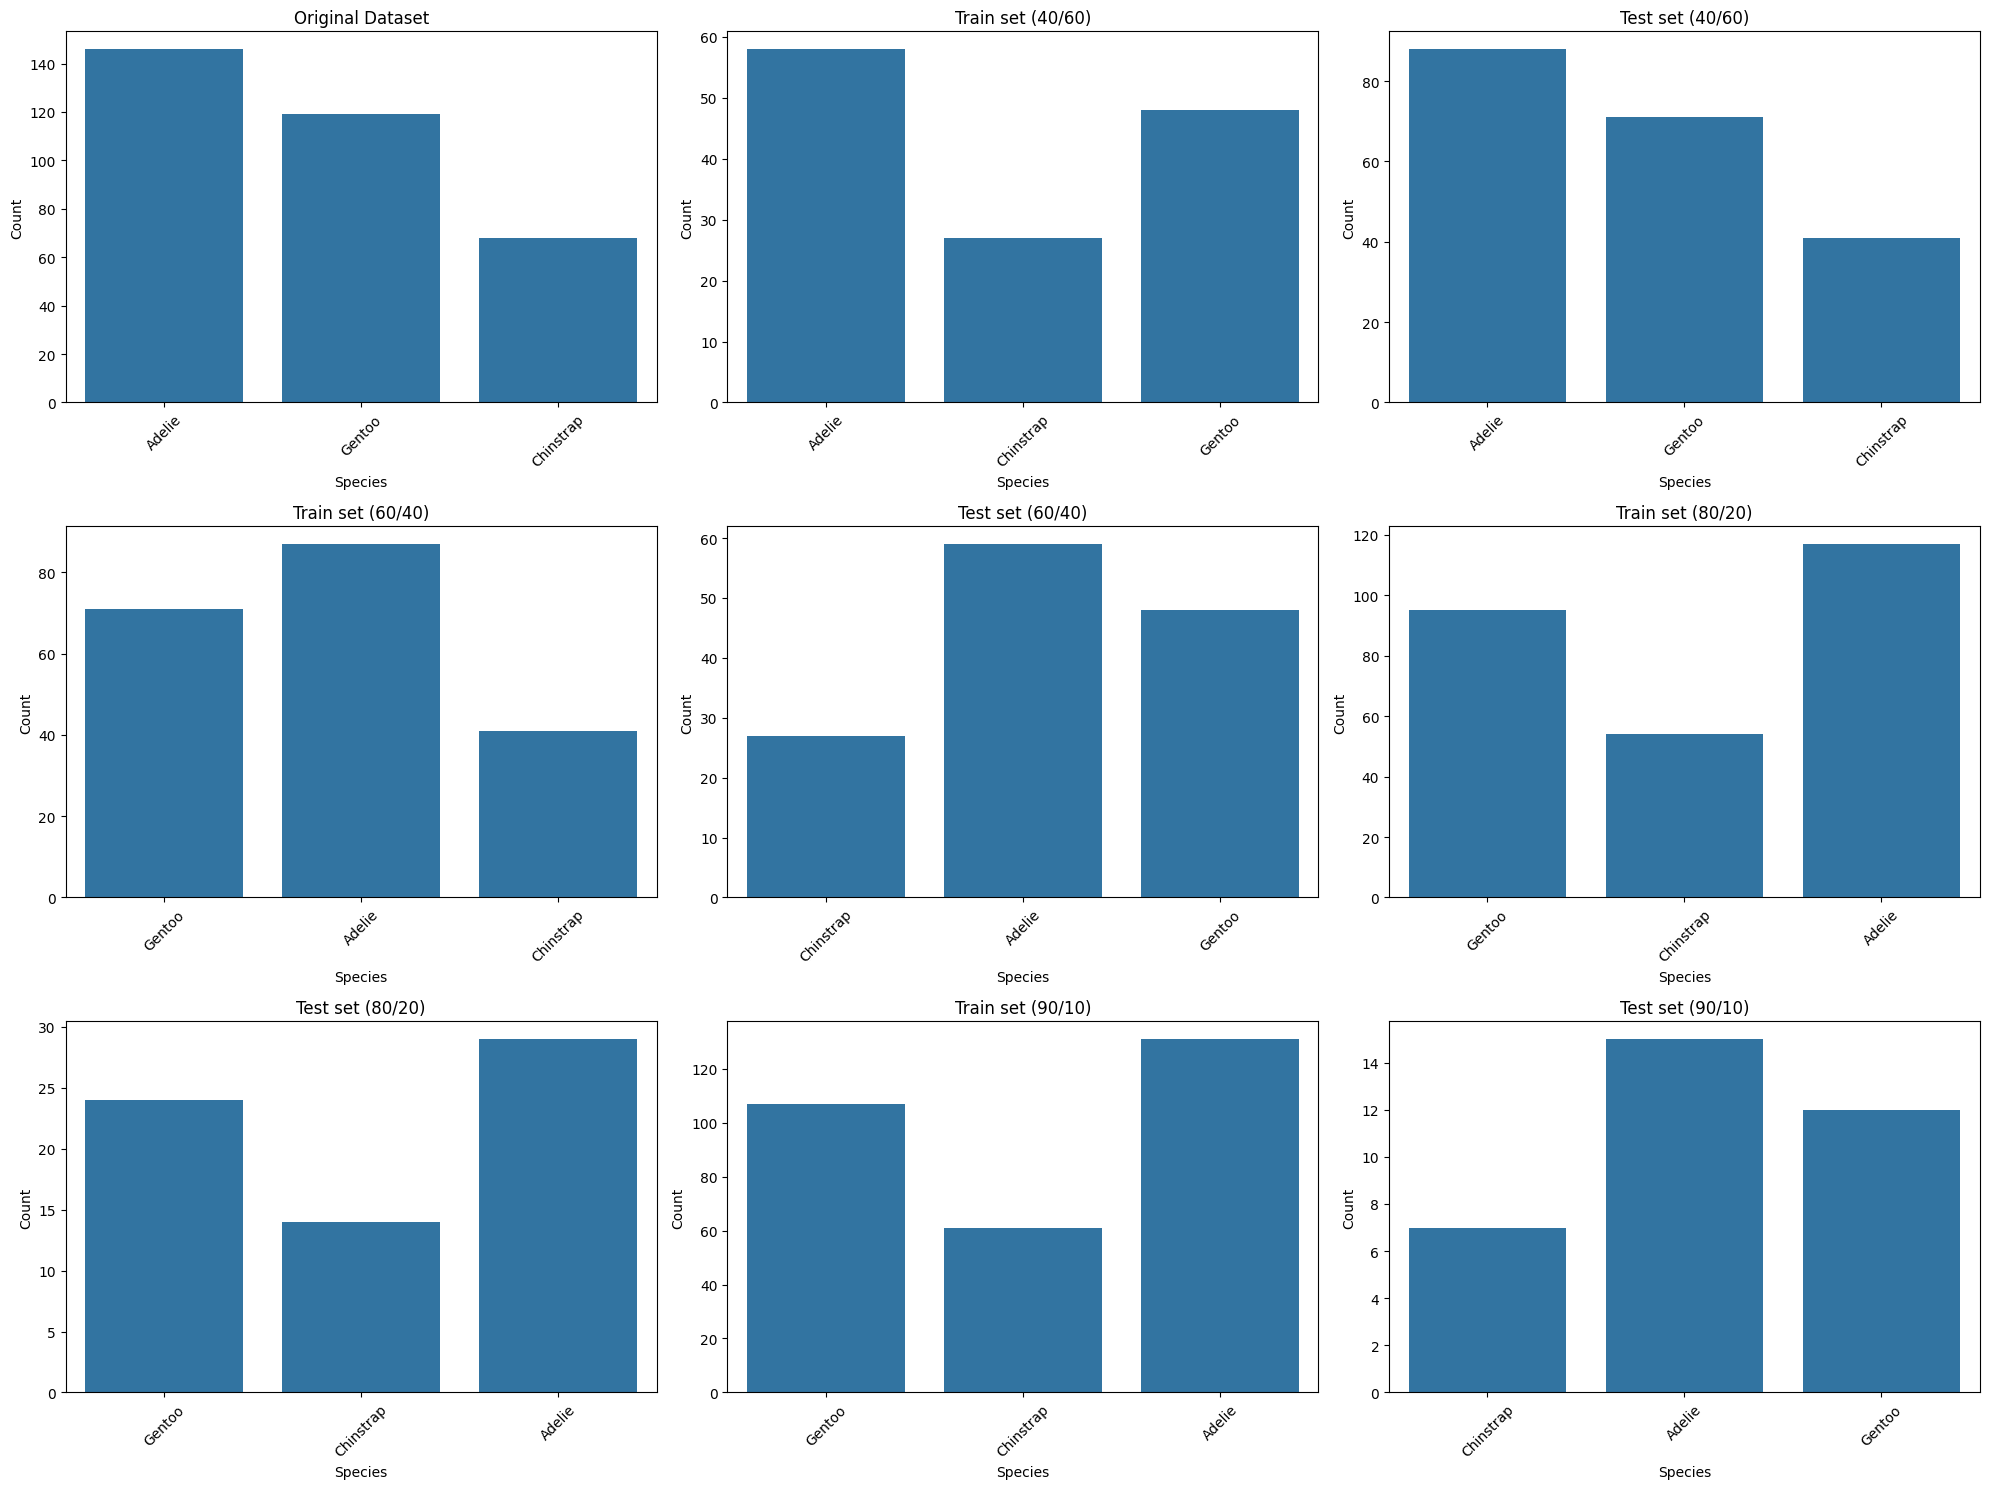

In [49]:
# Xóa các cột không cần thiết để tạo FEATURES
FEATURES = DATA.drop(columns=["species", "island", "year"])

# Chuyển các cột phân loại thành biến giả
FEATURES = pd.get_dummies(FEATURES, drop_first=True)

# Lấy các nhãn (LABELS)
LABELS = DATA["species"]

# Chia dữ liệu thành các phần train-test (test_size là tỷ lệ phần trăm chia)
features_train1 , features_test1, labels_train1, labels_test1 = train_test_split(FEATURES, LABELS, test_size=0.6, random_state=42, stratify=LABELS)
features_train2, features_test2, labels_train2, labels_test2 = train_test_split(FEATURES, LABELS, test_size=0.4, random_state=42, stratify=LABELS)
features_train3, features_test3, labels_train3, labels_test3 = train_test_split(FEATURES, LABELS, test_size=0.2, random_state=42, stratify=LABELS)
features_train4, features_test4, labels_train4, labels_test4 = train_test_split(FEATURES, LABELS, test_size=0.1, random_state=42, stratify=LABELS)

def plot_distribution(labels_list, titles_list):
    plt.figure(figsize=(20, 15))  # Tăng chiều cao vì có 3 dòng
    
    for i, (labels, title) in enumerate(zip(labels_list, titles_list), 1):
        plt.subplot(3, 3, i)  # 3 dòng, 3 cột
        sns.countplot(x=labels)
        plt.title(title)
        plt.xticks(rotation=45)
        plt.xlabel('Species')
        plt.ylabel('Count')
    
    plt.tight_layout()
    plt.show()

# Các nhãn cần visualize
labels_list = [
    LABELS,
    labels_train1, labels_test1,
    labels_train2, labels_test2,
    labels_train3, labels_test3,
    labels_train4, labels_test4
]

# Tên tương ứng
titles_list = [
    "Original Dataset",
    "Train set (40/60)", "Test set (40/60)",
    "Train set (60/40)", "Test set (60/40)",
    "Train set (80/20)", "Test set (80/20)",
    "Train set (90/10)", "Test set (90/10)"
]

# Gọi hàm để vẽ
plot_distribution(labels_list, titles_list)

# TRAIN MODEL 

In [50]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state= 42)
clf.fit(features_train1, labels_train1)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [51]:
clf2 = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state= 42)
clf2.fit(features_train2, labels_train2)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [52]:
clf3 = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state= 42)
clf3.fit(features_train3, labels_train3)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [53]:
clf4 = DecisionTreeClassifier(criterion="entropy" , max_depth=3, random_state= 42)
clf4.fit(features_train4, labels_train4)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

# VISUALIZE DECISION TREE

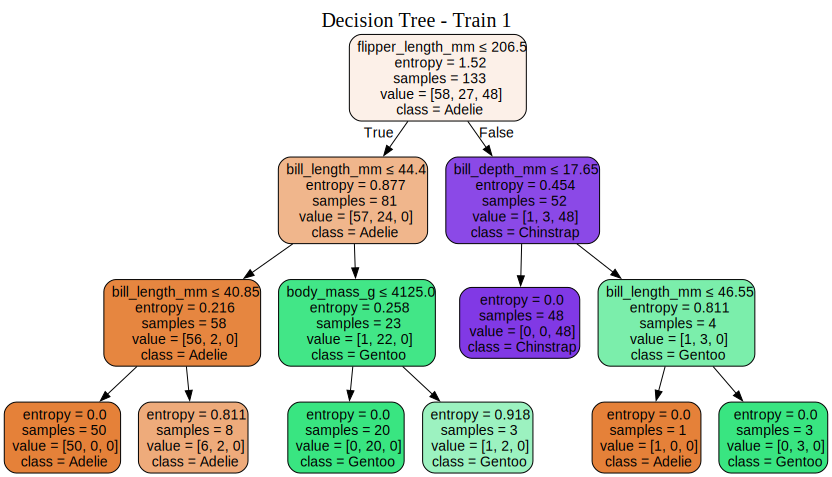

In [54]:
dot_data = export_graphviz(
    clf, 
    out_file=None, 
    feature_names=features_train1.columns, 
    class_names=['Adelie', 'Gentoo', 'Chinstrap'],
    filled=True, 
    rounded=True, 
    special_characters=True
)

# Thêm label vào dòng digraph
dot_data = dot_data.replace('digraph Tree {', 'digraph Tree {\nlabel="Decision Tree - Train 1"; labelloc=top; fontsize=20;')

graph = graphviz.Source(dot_data)
graph


Confusion Matrix:
[[86  2  0]
 [ 4 37  0]
 [ 0  1 70]]


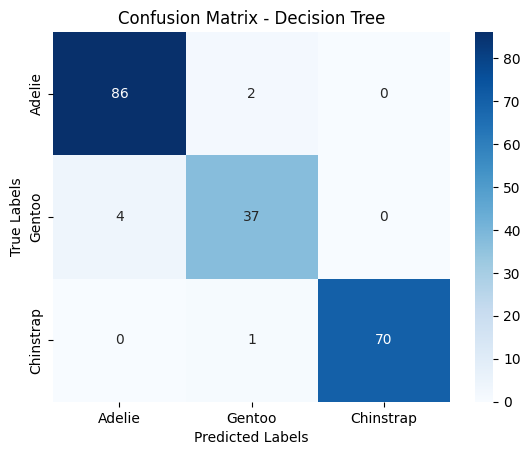


Classification Report:
              precision    recall  f1-score   support

      Adelie       0.96      0.98      0.97        88
   Chinstrap       0.93      0.90      0.91        41
      Gentoo       1.00      0.99      0.99        71

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.97      0.96      0.96       200



In [55]:
y_pred = clf.predict(features_test1)
cm = confusion_matrix(labels_test1, y_pred)
print("Confusion Matrix:")
print(cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Adelie', 'Gentoo', 'Chinstrap'],
            yticklabels=['Adelie', 'Gentoo', 'Chinstrap'])

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Decision Tree')
plt.show()
print("\nClassification Report:")
print(classification_report(labels_test1, y_pred))

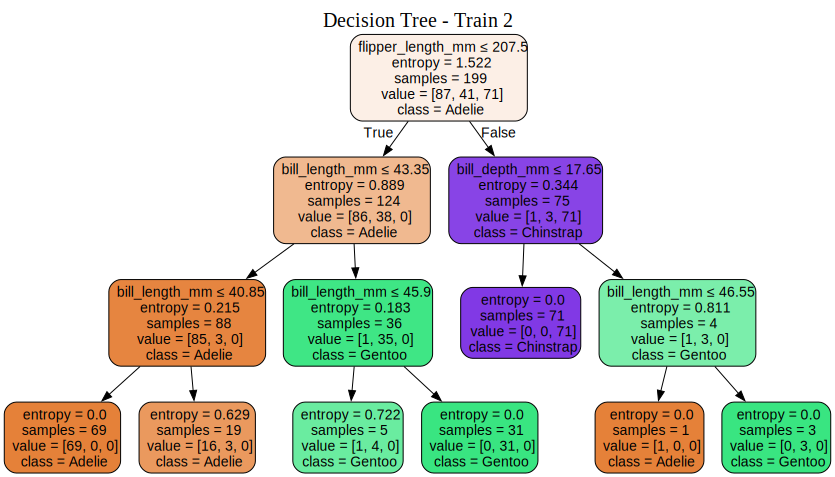

Confusion Matrix:
[[57  2  0]
 [ 2 25  0]
 [ 0  1 47]]


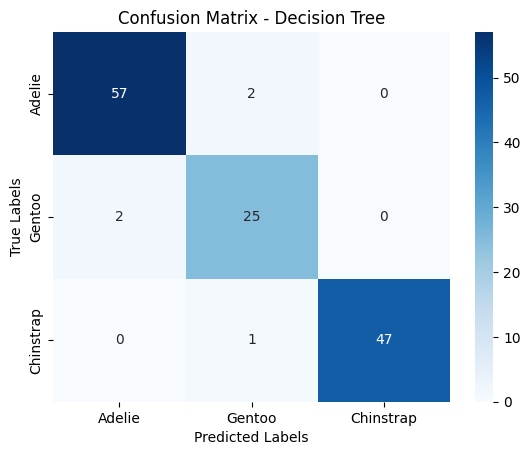


Classification Report:
              precision    recall  f1-score   support

      Adelie       0.97      0.97      0.97        59
   Chinstrap       0.89      0.93      0.91        27
      Gentoo       1.00      0.98      0.99        48

    accuracy                           0.96       134
   macro avg       0.95      0.96      0.95       134
weighted avg       0.96      0.96      0.96       134



In [56]:
# Xuất cây dưới dạng dot data
dot_data = export_graphviz(clf2, 
                           out_file=None, 
                           feature_names=features_train2.columns, 
                           class_names=['Adelie', 'Gentoo', 'Chinstrap'], 
                           filled=True, 
                           rounded=True, 
                           special_characters=True)
dot_data = dot_data.replace('digraph Tree {', 'digraph Tree {\nlabel="Decision Tree - Train 2"; labelloc=top; fontsize=20;')

# Tạo graph từ dot data
graph = graphviz.Source(dot_data)
display(graph)

y_pred2 = clf.predict(features_test2)
cm = confusion_matrix(labels_test2, y_pred2)
print("Confusion Matrix:")
print(cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Adelie', 'Gentoo', 'Chinstrap'],
            yticklabels=['Adelie', 'Gentoo', 'Chinstrap'])

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

print("\nClassification Report:")
print(classification_report(labels_test2, y_pred2))

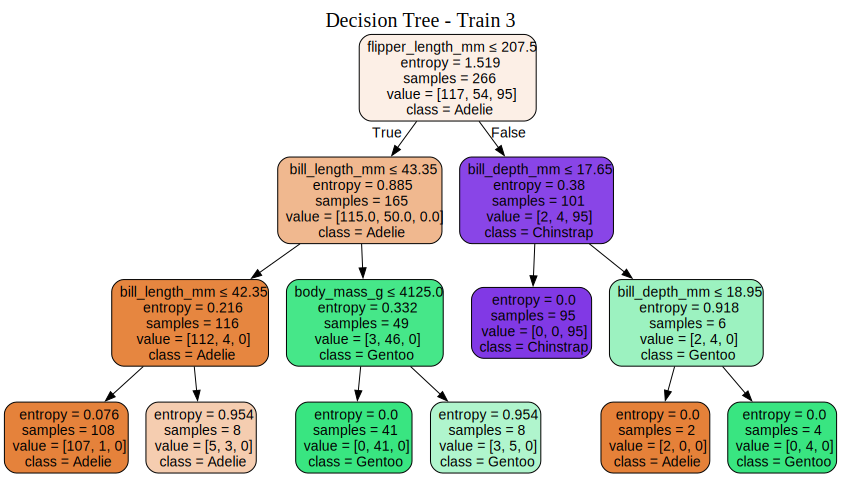

Confusion Matrix:
[[28  1  0]
 [ 1 13  0]
 [ 0  1 23]]


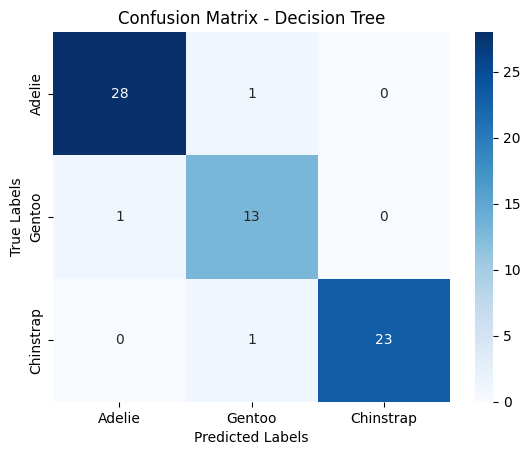


Classification Report:
              precision    recall  f1-score   support

      Adelie       0.97      0.97      0.97        29
   Chinstrap       0.87      0.93      0.90        14
      Gentoo       1.00      0.96      0.98        24

    accuracy                           0.96        67
   macro avg       0.94      0.95      0.95        67
weighted avg       0.96      0.96      0.96        67



In [57]:

dot_data = export_graphviz(clf3, 
          feature_names=features_train3.columns, 
          class_names=['Adelie', 'Gentoo', 'Chinstrap'], 
          filled=True, 
          rounded=True, 
          special_characters=True)

dot_data = dot_data.replace('digraph Tree {', 'digraph Tree {\nlabel="Decision Tree - Train 3"; labelloc=top; fontsize=20;')

graph = graphviz.Source(dot_data)
display(graph)

y_pred3 = clf.predict(features_test3)
cm = confusion_matrix(labels_test3, y_pred3)
print("Confusion Matrix:")
print(cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Adelie', 'Gentoo', 'Chinstrap'],
            yticklabels=['Adelie', 'Gentoo', 'Chinstrap'])

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

print("\nClassification Report:")
print(classification_report(labels_test3, y_pred3))

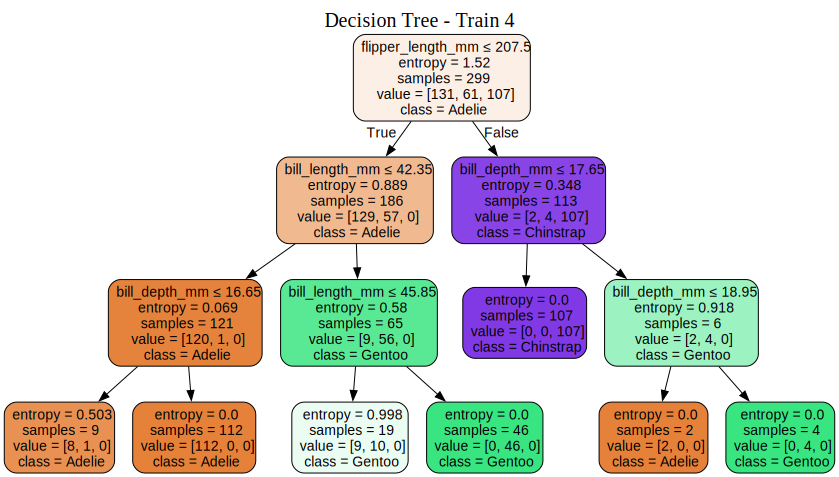

Confusion Matrix:
[[14  1  0]
 [ 0  7  0]
 [ 0  1 11]]


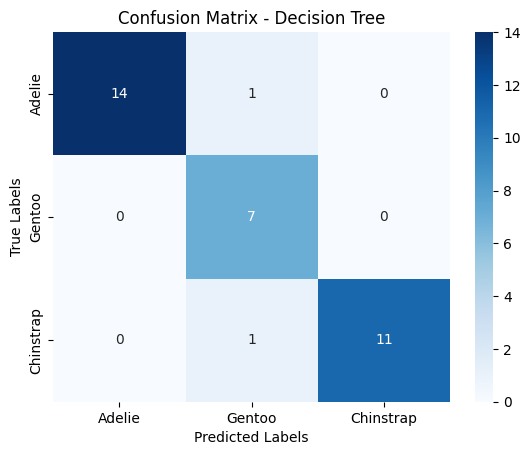


Classification Report:
              precision    recall  f1-score   support

      Adelie       1.00      0.93      0.97        15
   Chinstrap       0.78      1.00      0.88         7
      Gentoo       1.00      0.92      0.96        12

    accuracy                           0.94        34
   macro avg       0.93      0.95      0.93        34
weighted avg       0.95      0.94      0.94        34



In [58]:
dot_data = export_graphviz(clf4, 
          feature_names=features_train2.columns, 
          class_names=['Adelie', 'Gentoo', 'Chinstrap'], 
          filled=True, 
          rounded=True, 
          special_characters=True)

dot_data = dot_data.replace('digraph Tree {', 'digraph Tree {\nlabel="Decision Tree - Train 4"; labelloc=top; fontsize=20;')

graph = graphviz.Source(dot_data)
display(graph)


y_pred4 = clf.predict(features_test4)
cm = confusion_matrix(labels_test4, y_pred4)
print("Confusion Matrix:")
print(cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Adelie', 'Gentoo', 'Chinstrap'],
            yticklabels=['Adelie', 'Gentoo', 'Chinstrap'])

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

print("\nClassification Report:")
print(classification_report(labels_test4, y_pred4))

# EVALUATION METRICS

In [59]:
accuracy = accuracy_score(labels_test1, y_pred)

# Ratio of wrong labels valuation
misclassified_count = (y_pred != labels_test1).sum()
total_samples = len(labels_test1)
misclassified_rate = 100 * misclassified_count / total_samples
# Visualization of the ratio of wrong labels
print(f"Numbers of Wrong labels: {misclassified_count}/{total_samples}")
print(f"Ratio of wrong labels: {misclassified_rate:.2f}%")

Numbers of Wrong labels: 7/200
Ratio of wrong labels: 3.50%


In [60]:
accuracy = accuracy_score(labels_test2, y_pred2)

# Ratio of wrong labels valuation
misclassified_count = (y_pred2 != labels_test2).sum()
total_samples = len(labels_test2)
misclassified_rate = 100 * misclassified_count / total_samples
# Visualization of the ratio of wrong labels
print(f"Numbers of Wrong labels: {misclassified_count}/{total_samples}")
print(f"Ratio of wrong labels: {misclassified_rate:.2f}%")

Numbers of Wrong labels: 5/134
Ratio of wrong labels: 3.73%


In [61]:
accuracy = accuracy_score(labels_test3, y_pred3)

# Ratio of wrong labels valuation
misclassified_count = (y_pred3 != labels_test3).sum()
total_samples = len(labels_test3)
misclassified_rate = 100 * misclassified_count / total_samples
# Visualization of the ratio of wrong labels
print(f"Numbers of Wrong labels: {misclassified_count}/{total_samples}")
print(f"Ratio of wrong labels: {misclassified_rate:.2f}%")

Numbers of Wrong labels: 3/67
Ratio of wrong labels: 4.48%


In [62]:
accuracy = accuracy_score(labels_test4, y_pred4)

# Ratio of wrong labels valuation
misclassified_count = (y_pred4 != labels_test4).sum()
total_samples = len(labels_test4)
misclassified_rate = 100 * misclassified_count / total_samples
# Visualization of the ratio of wrong labels
print(f"Numbers of Wrong labels: {misclassified_count}/{total_samples}")
print(f"Ratio of wrong labels: {misclassified_rate:.2f}%")

Numbers of Wrong labels: 2/34
Ratio of wrong labels: 5.88%


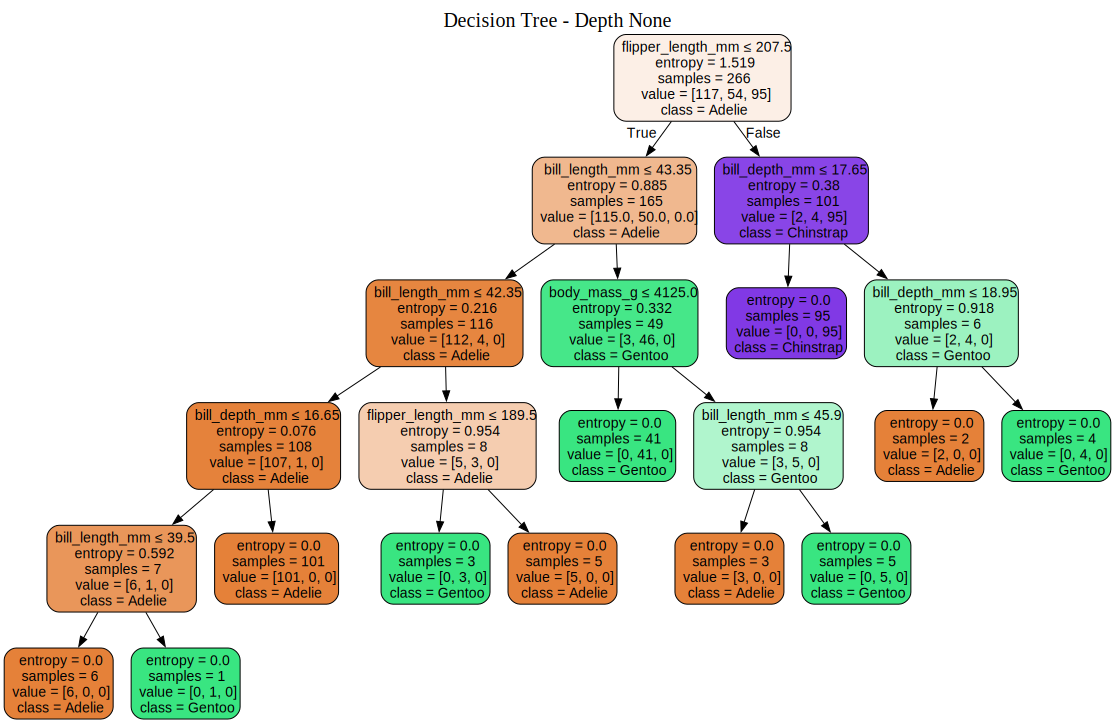

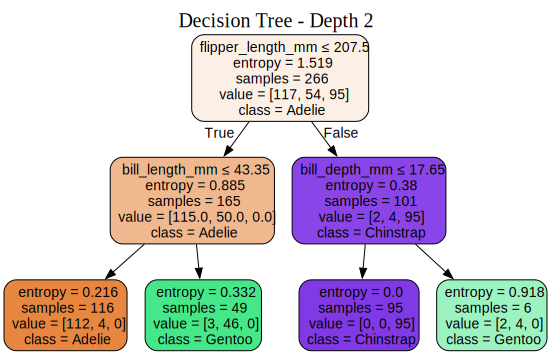

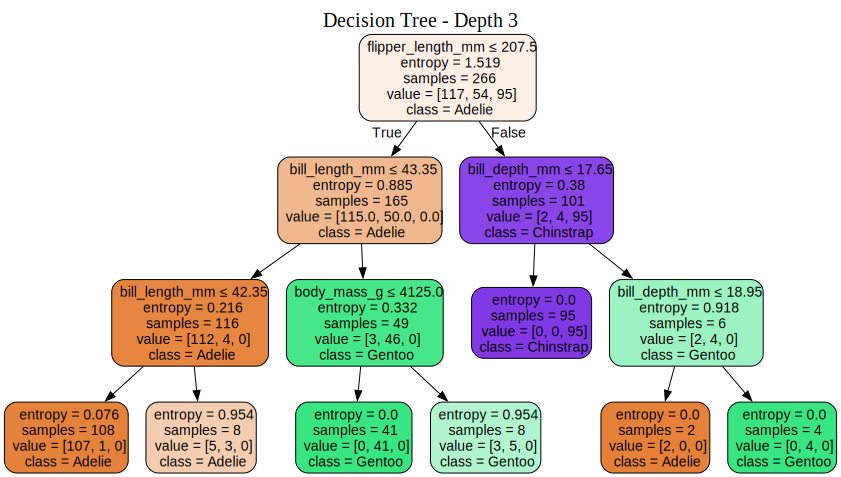

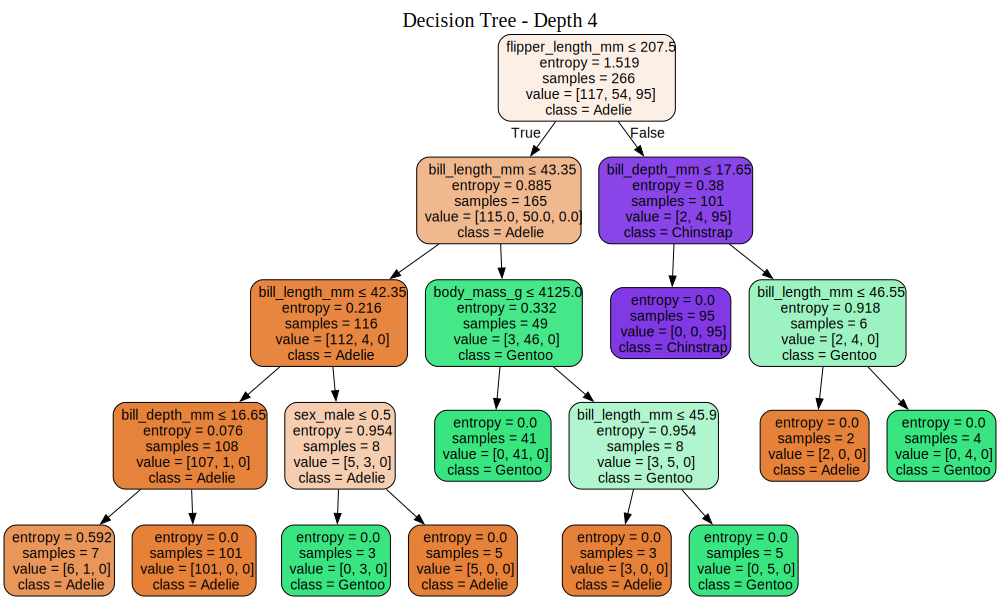

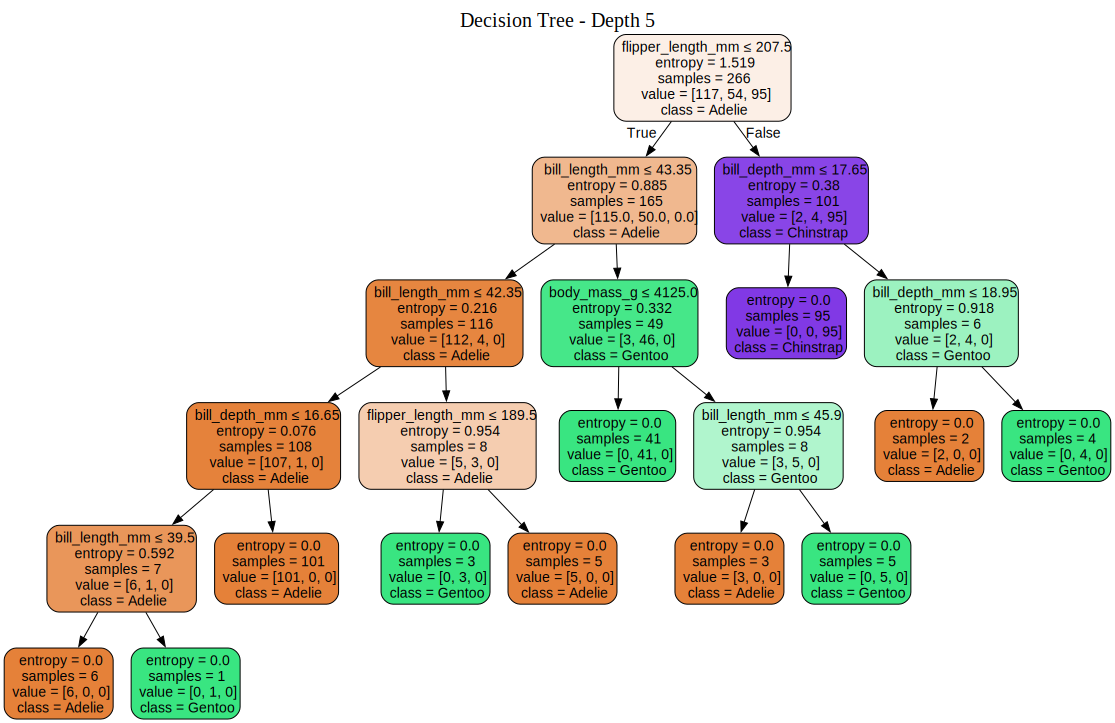

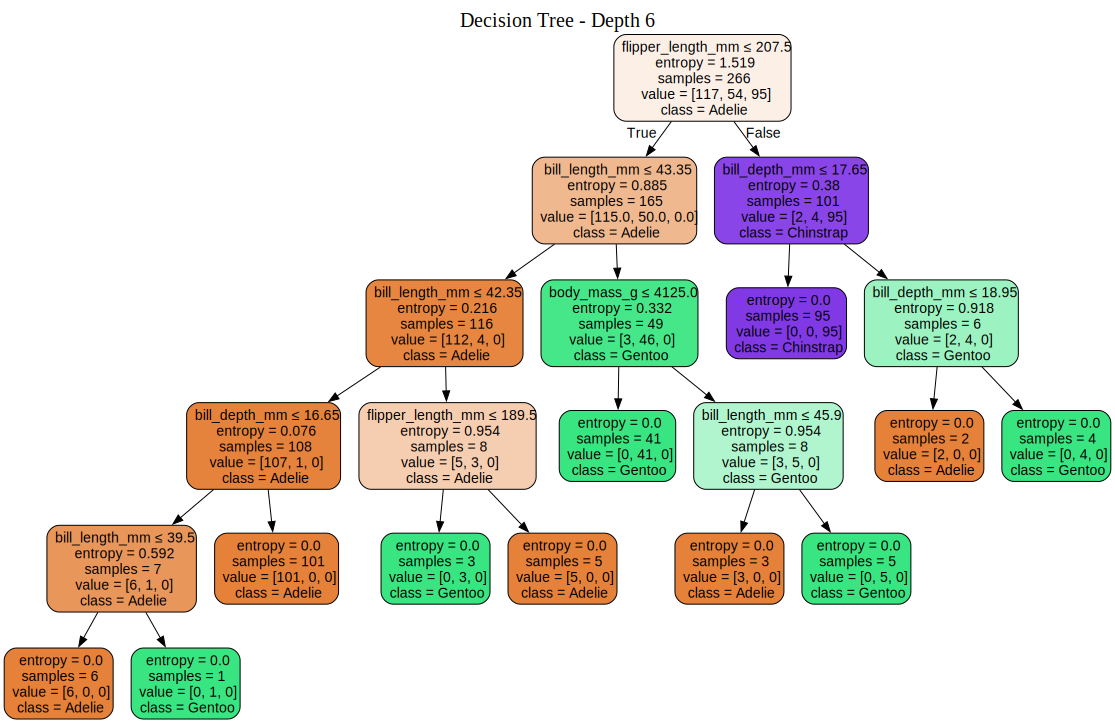

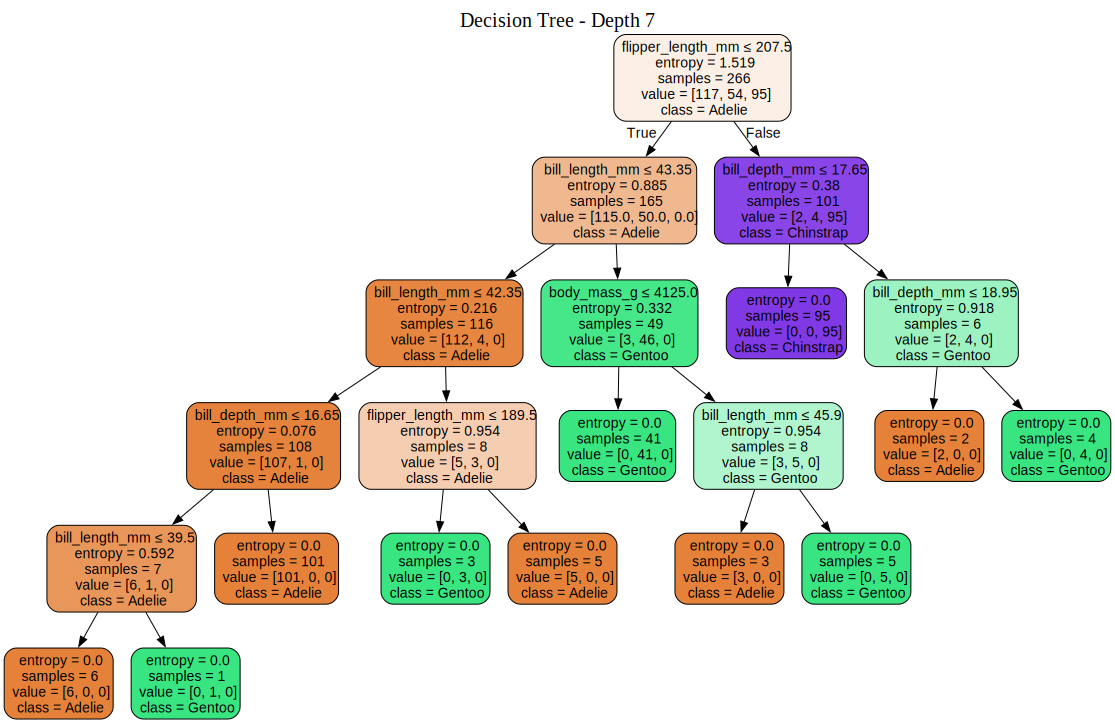

Max Depth | Test Accuracy
-------------------------
     None | 0.9552
        2 | 0.9403
        3 | 0.9403
        4 | 0.9552
        5 | 0.9552
        6 | 0.9552
        7 | 0.9552


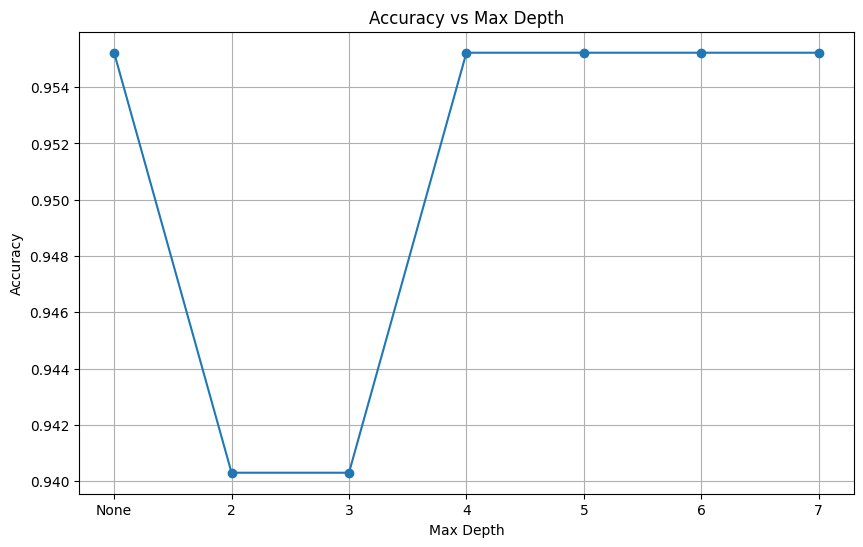

In [63]:
max_depth_values = [None, 2, 3, 4, 5, 6, 7]
accuracy_results = {}

for depth in max_depth_values:
    clf = DecisionTreeClassifier(criterion="entropy",max_depth=depth, random_state=42)
    clf.fit(features_train3, labels_train3)
    
    # Dự đoán
    y_pred = clf.predict(features_test3)
    
    # Tính accuracy
    acc = accuracy_score(labels_test3, y_pred)
    accuracy_results[depth] = acc
    
    # Vẽ cây với graphviz
    dot_data = export_graphviz(clf, 
                               feature_names=features_train3.columns, 
                               class_names=['Adelie', 'Gentoo', 'Chinstrap'],
                               filled=True, 
                               rounded=True, 
                               special_characters=True)
    dot_data = dot_data.replace(
        'digraph Tree {',
        f'digraph Tree {{\nlabel="Decision Tree - Depth {depth}"; labelloc=top; fontsize=20;'
    )
    graph = graphviz.Source(dot_data)
    
    # Lưu file tên theo max_depth
    depth_name = "none" if depth is None else str(depth)
    display(graph)

print("Max Depth | Test Accuracy")
print("-------------------------")
for depth, acc in accuracy_results.items():
    depth_str = "None" if depth is None else str(depth)
    print(f"{depth_str:>9} | {acc:.4f}")

# Vẽ biểu đồ accuracy theo max_depth
max_depth_values_plot = [1 if d is None else d for d in max_depth_values]

plt.figure(figsize=(10,6))
plt.plot(max_depth_values_plot, list(accuracy_results.values()), marker='o')
plt.title('Accuracy vs Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.xticks(max_depth_values_plot, labels=['None', 2, 3, 4, 5, 6, 7])  # gán nhãn đẹp
plt.grid()
plt.show()

# EXTENDED WORK : RANDOM FOREST CLASSIFICATION

Random Forest : To make it simple we know understand that Random is Random and Forest is a set of Tree. So that in this algorithm we need to build many desicion tree and each of them has randomize order and which Features is used in each step. After we random n data from the dataset then we randomize k features from the set of features(Each features could be the same) and then we weight bias of each Tree output to build the final model.

In [64]:
clf_extended = RFC(n_estimators=10, random_state=42)
clf_extended.fit(features_train1, labels_train1)

y_pred_rf = clf_extended.predict(features_test1)

# Confusion Matrix
cm_rf = confusion_matrix(labels_test1, y_pred_rf)
print("Confusion Matrix (Random Forest):")
print(cm_rf)

# Classification Report
print("Classification Report (Random Forest):")
print(classification_report(labels_test1, y_pred_rf))

Confusion Matrix (Random Forest):
[[86  2  0]
 [ 2 39  0]
 [ 5  0 66]]
Classification Report (Random Forest):
              precision    recall  f1-score   support

      Adelie       0.92      0.98      0.95        88
   Chinstrap       0.95      0.95      0.95        41
      Gentoo       1.00      0.93      0.96        71

    accuracy                           0.95       200
   macro avg       0.96      0.95      0.95       200
weighted avg       0.96      0.95      0.96       200



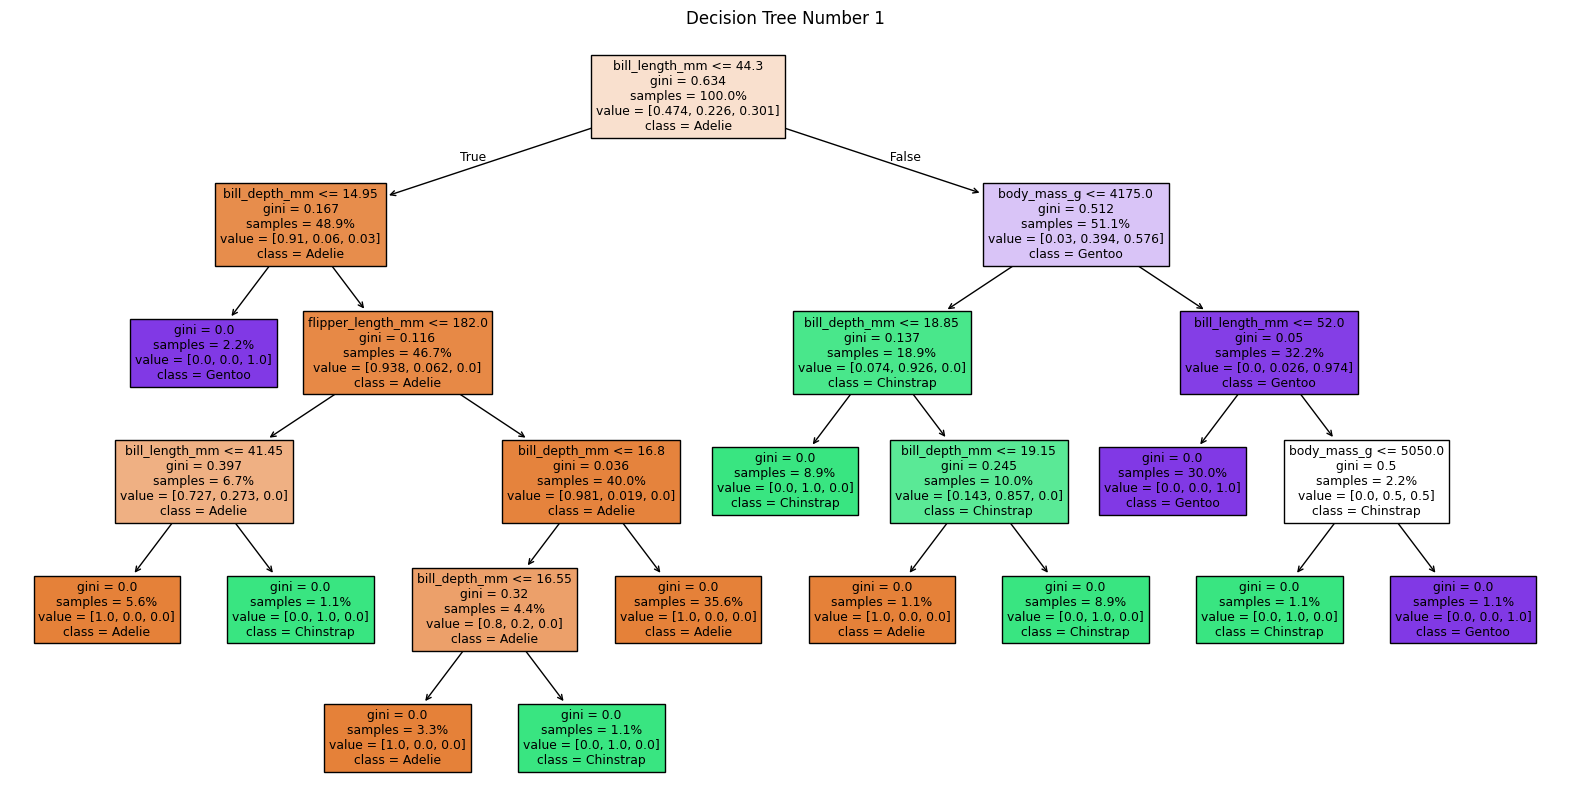

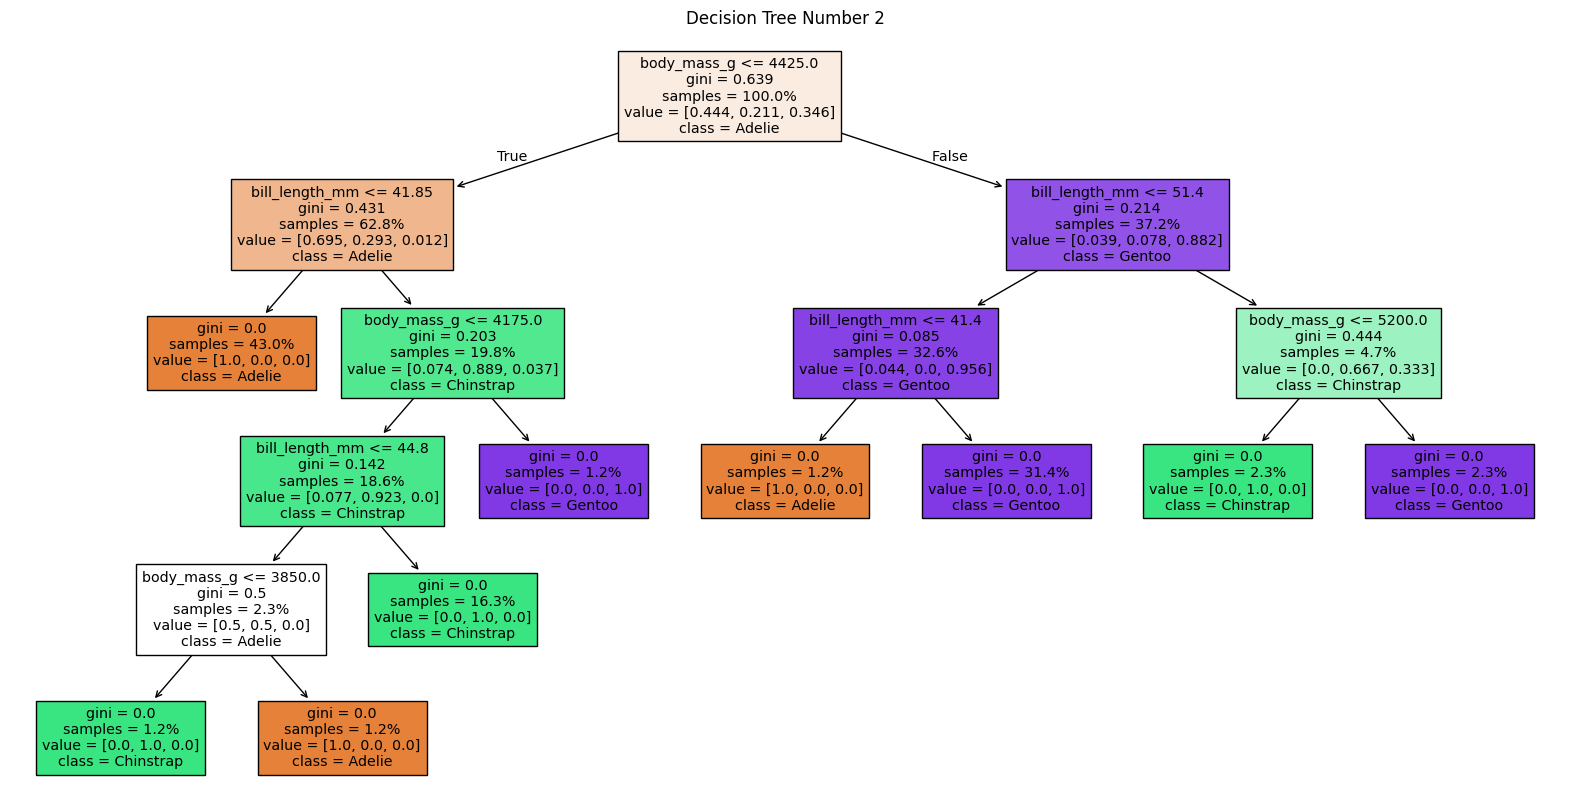

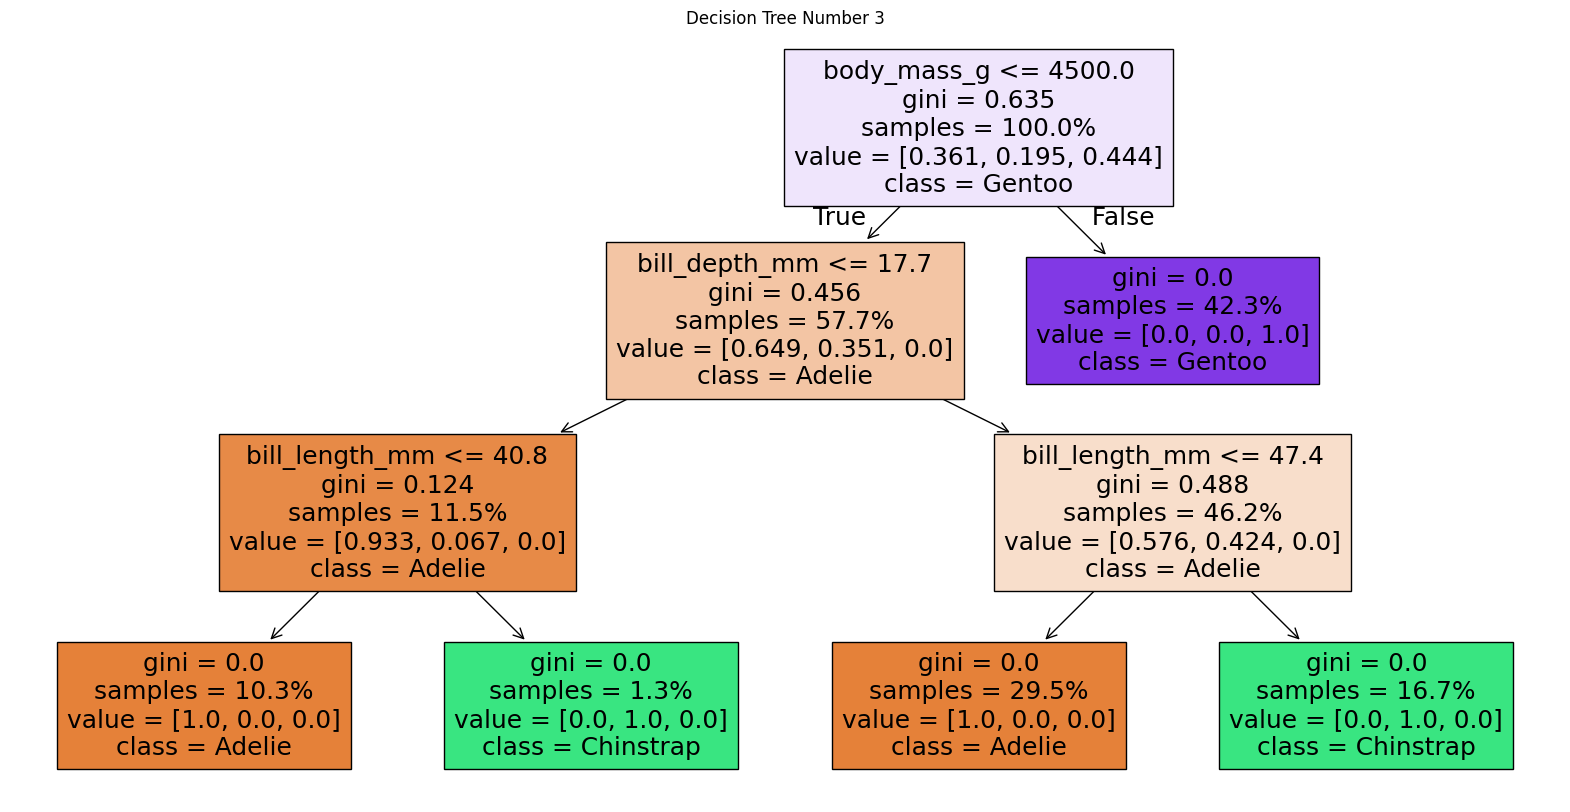

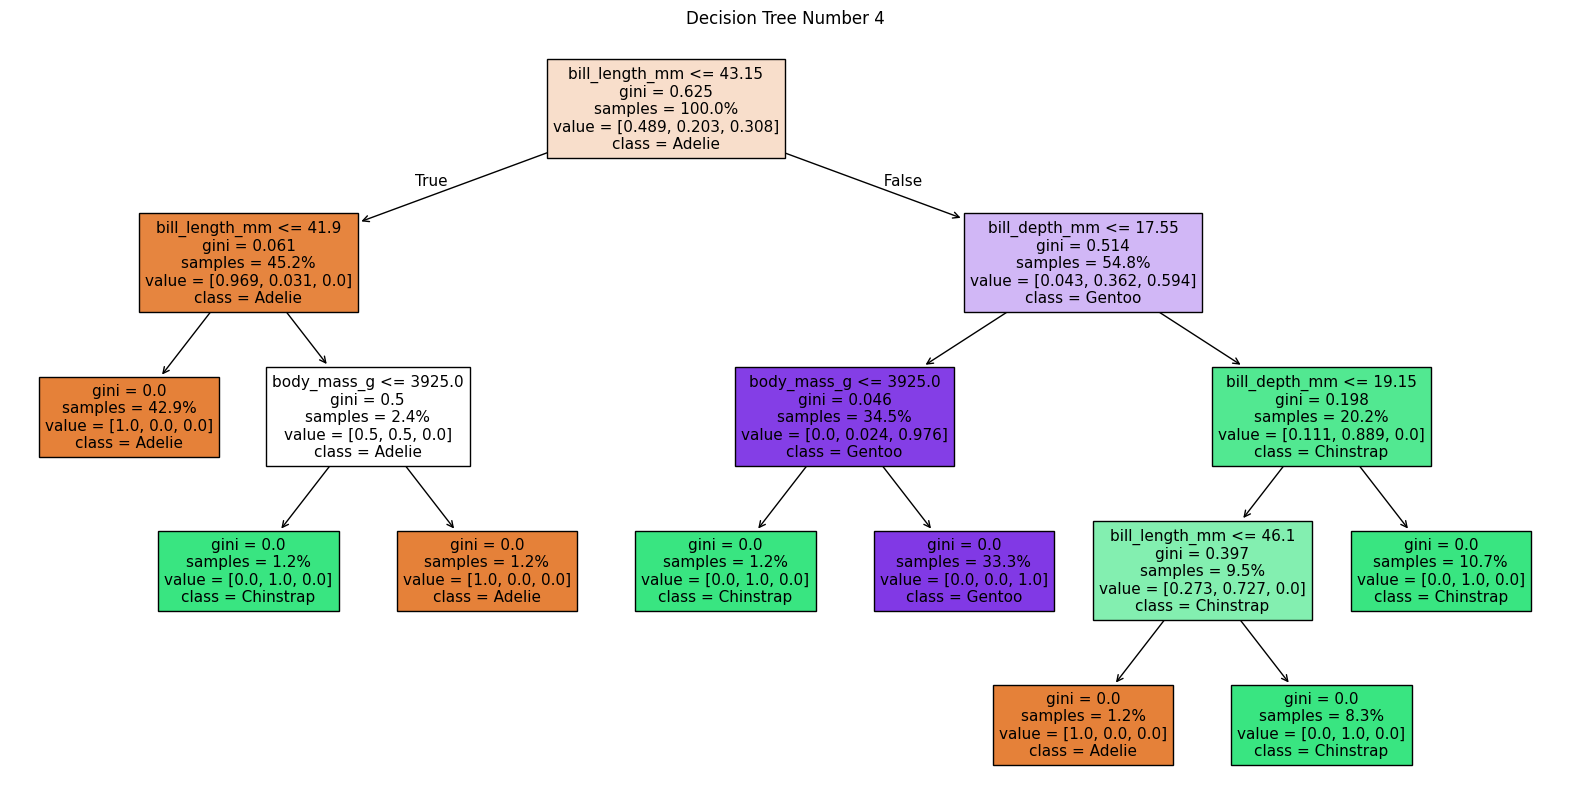

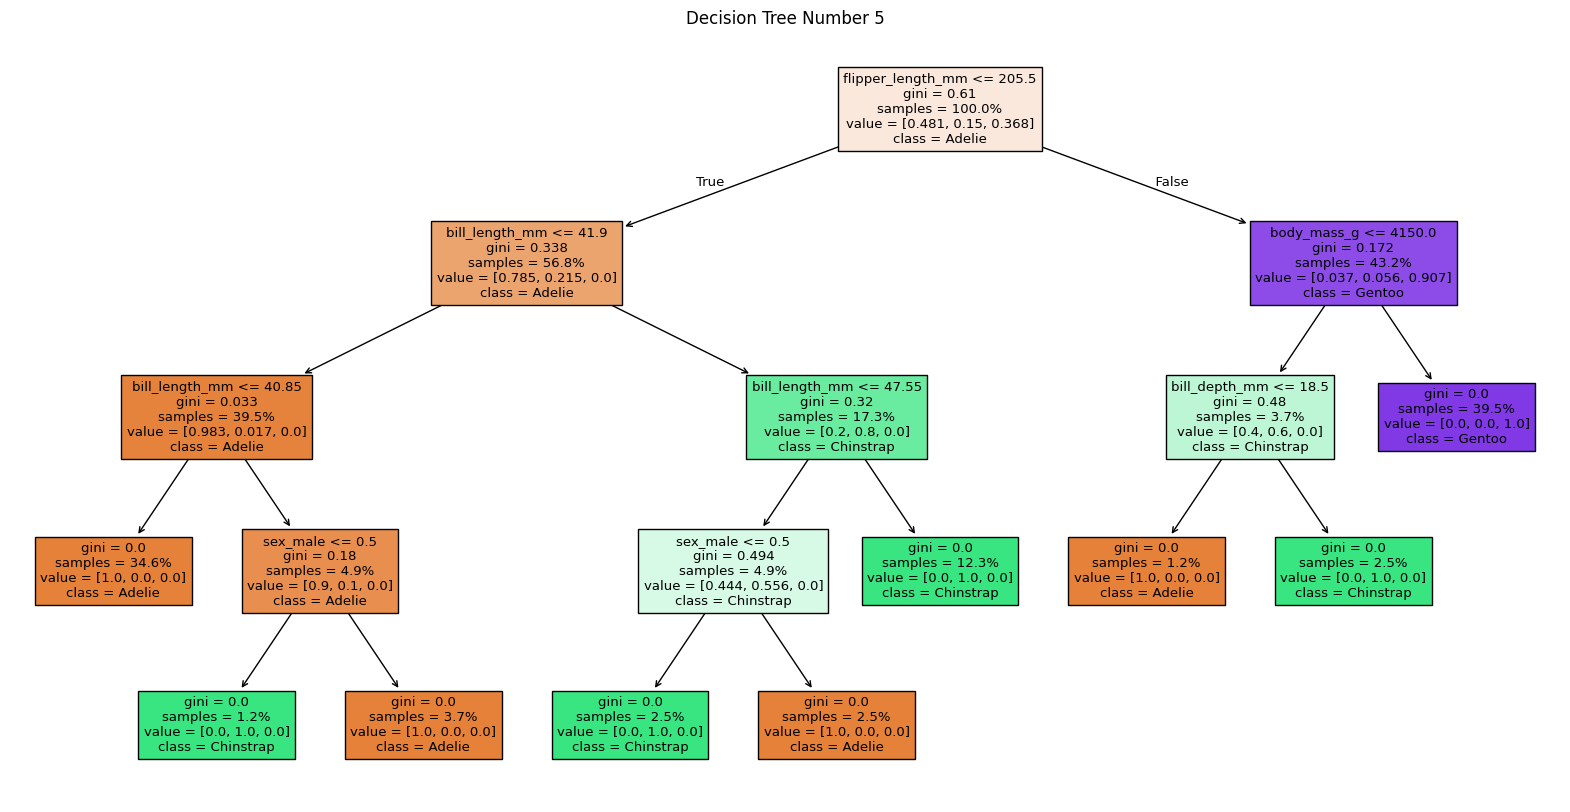

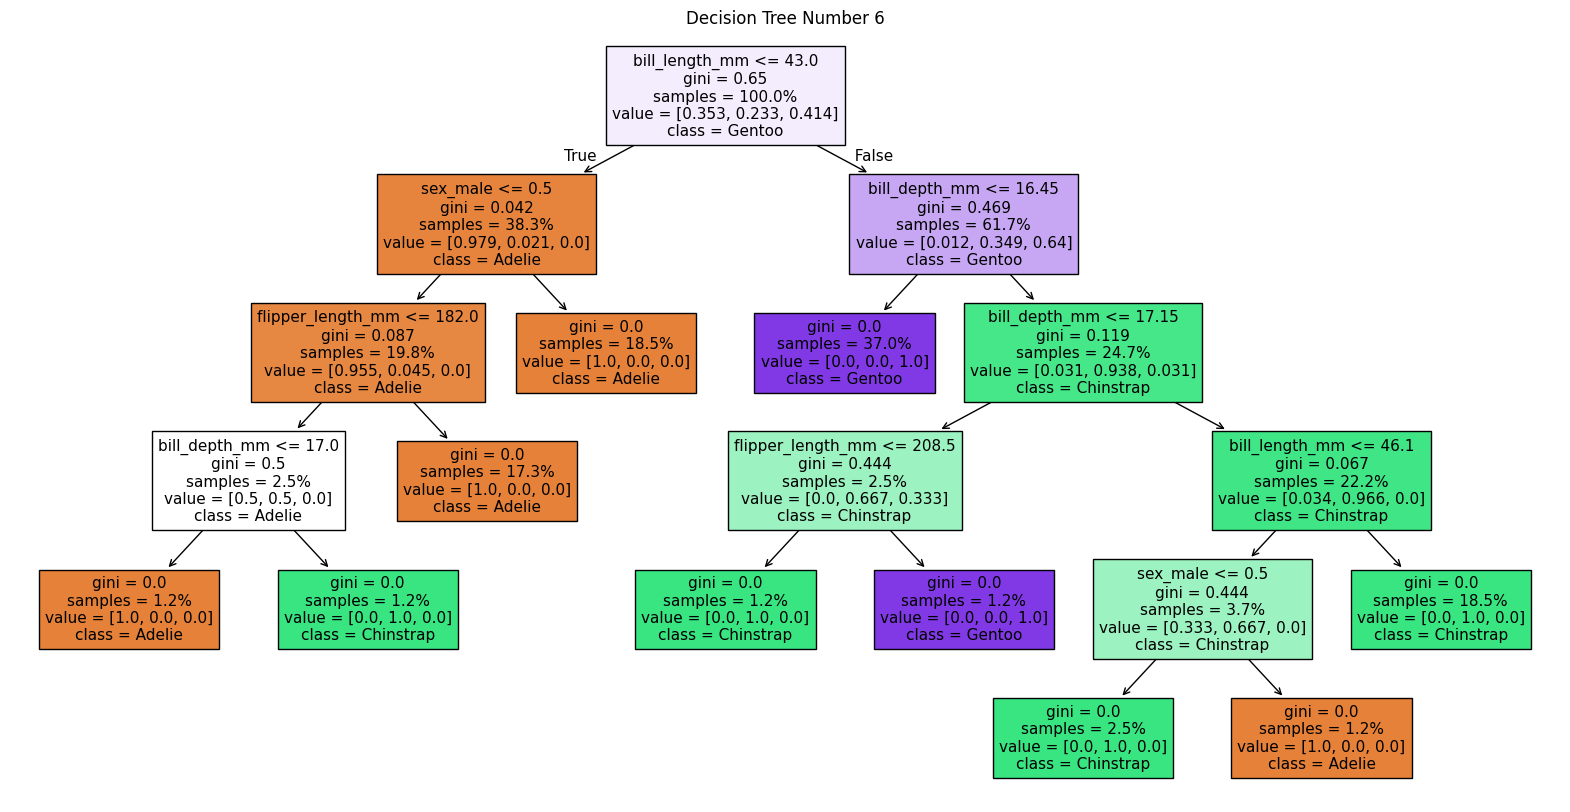

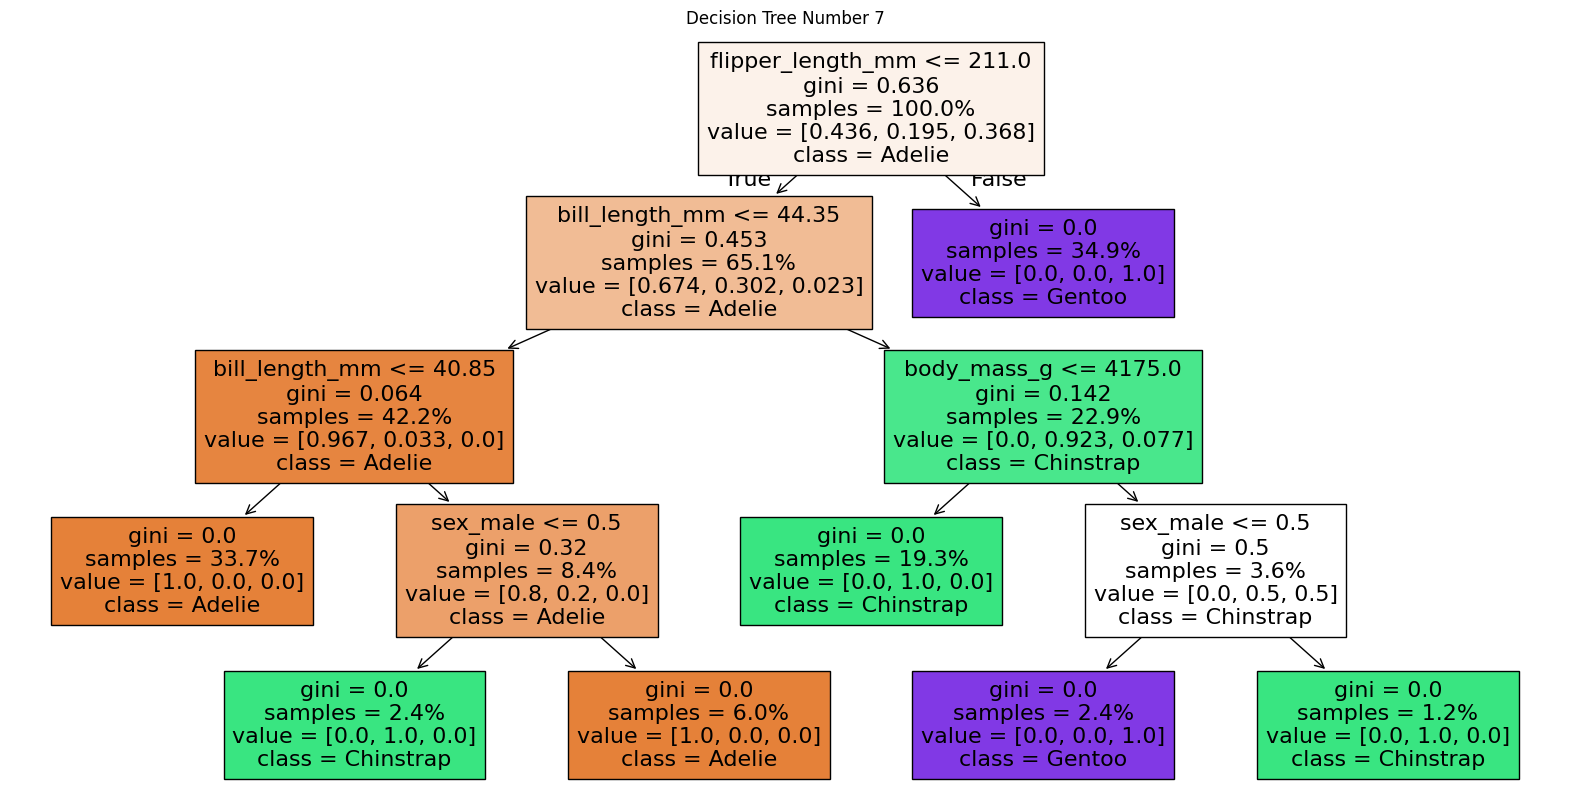

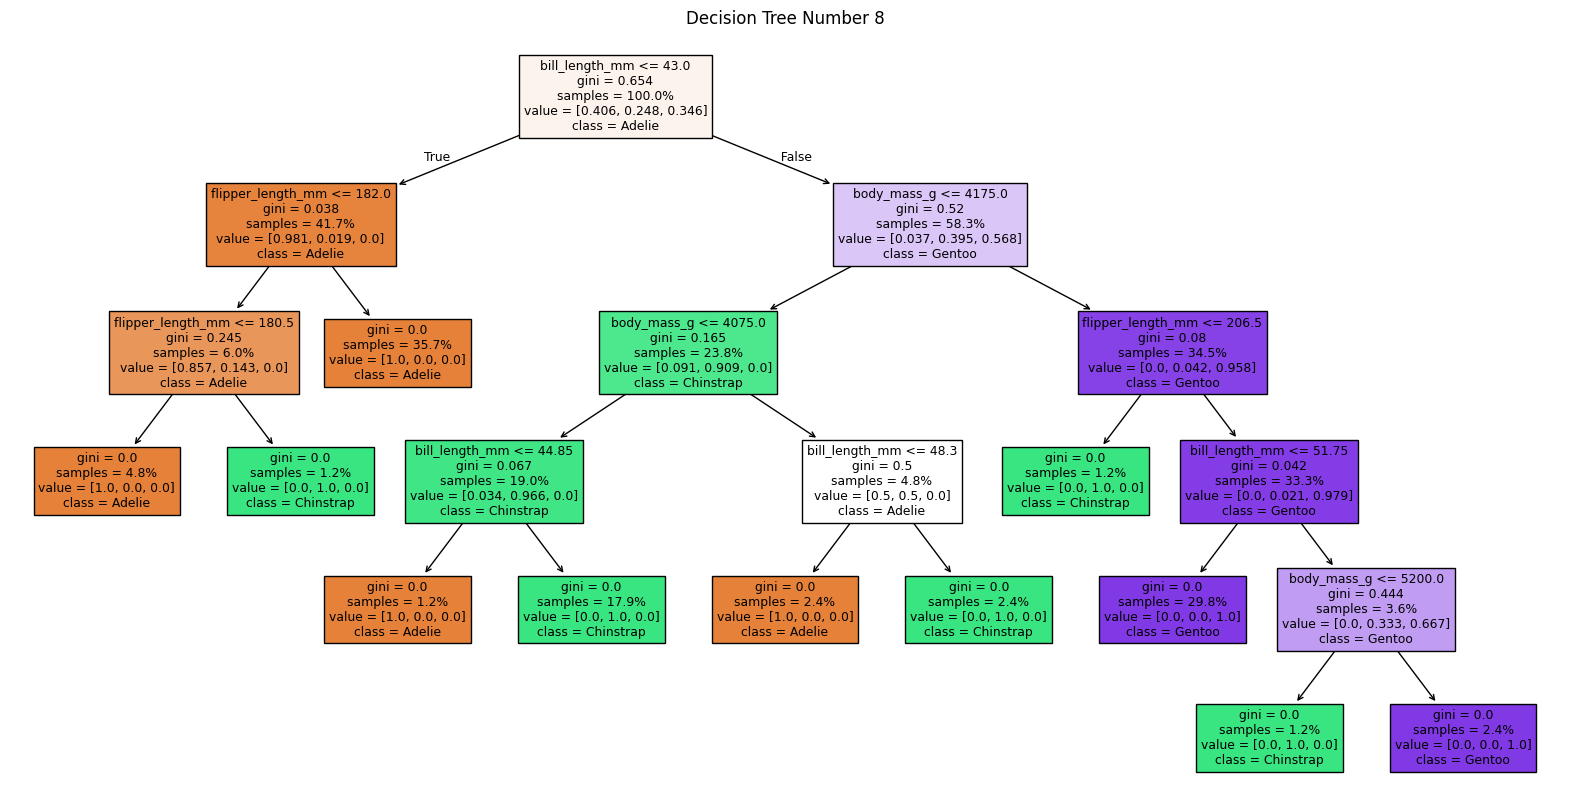

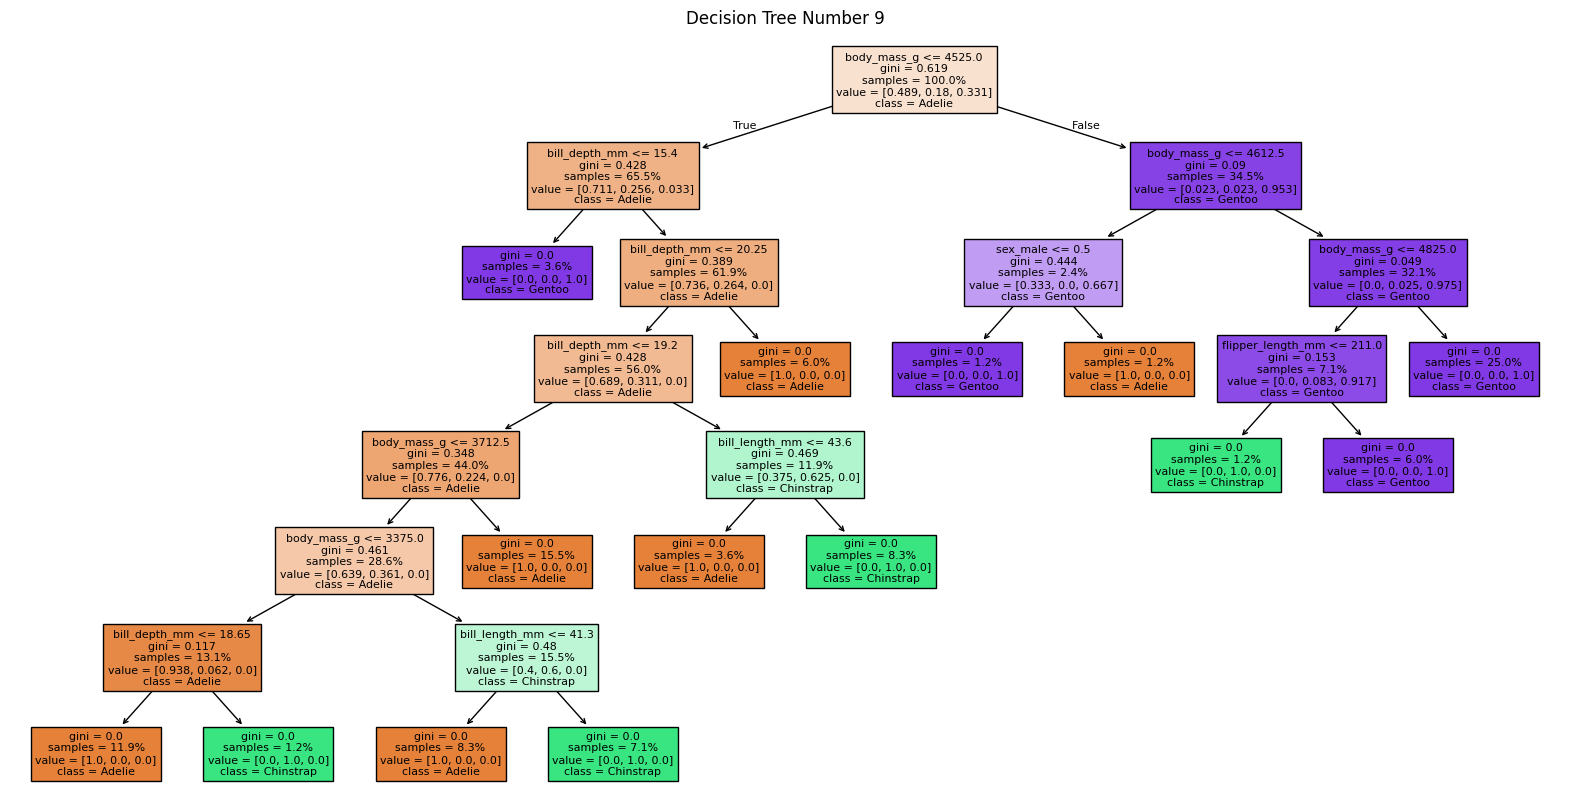

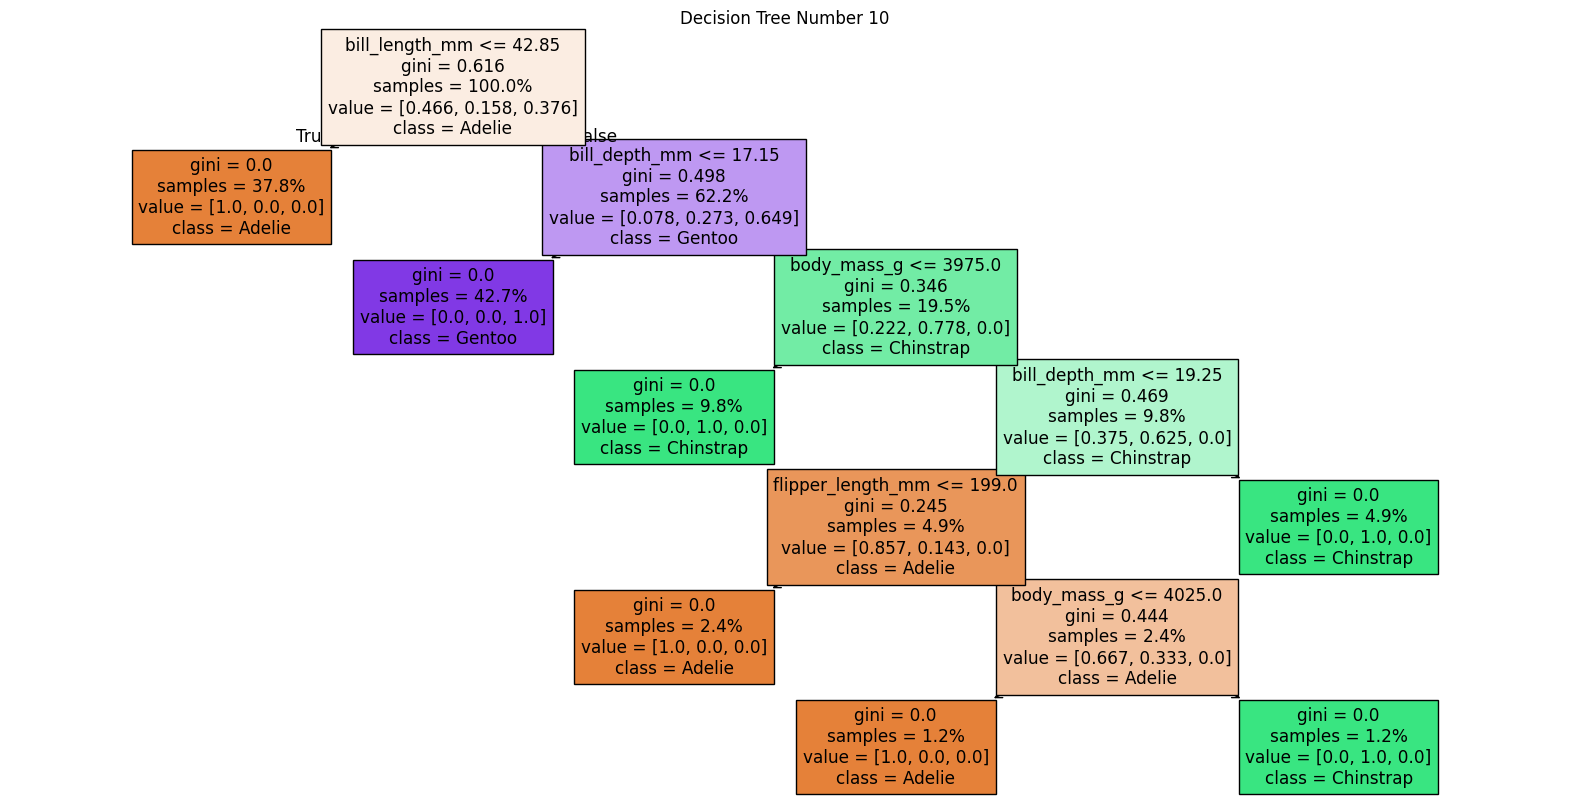

In [65]:
for i, tree in enumerate(clf_extended.estimators_):
    plt.figure(figsize=(20,10)) 
    plot_tree(tree, 
              filled=True, 
              feature_names=features_test4.columns.tolist(),  
              class_names=clf_extended.classes_.astype(str), 
              proportion=True)  
    plt.title(f"Decision Tree Number {i+1}")  
    plt.show()

In [66]:
accuracy = accuracy_score(labels_test1, y_pred_rf)

# Ratio of wrong labels valuation
misclassified_count = (y_pred_rf != labels_test1).sum()
total_samples = len(labels_test1)
misclassified_rate = 100 * misclassified_count / total_samples
# Visualization of the ratio of wrong labels
print(f"Numbers of Wrong labels: {misclassified_count}/{total_samples}")
print(f"Ratio of wrong labels: {misclassified_rate:.2f}%")

Numbers of Wrong labels: 9/200
Ratio of wrong labels: 4.50%


As we see random forest goes with a better accuracy than traditional Decision Tree.

# REFERENCES

https://machinelearningcoban.com/tabml_book/ch_model/random_forest.html<br>
